/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S 

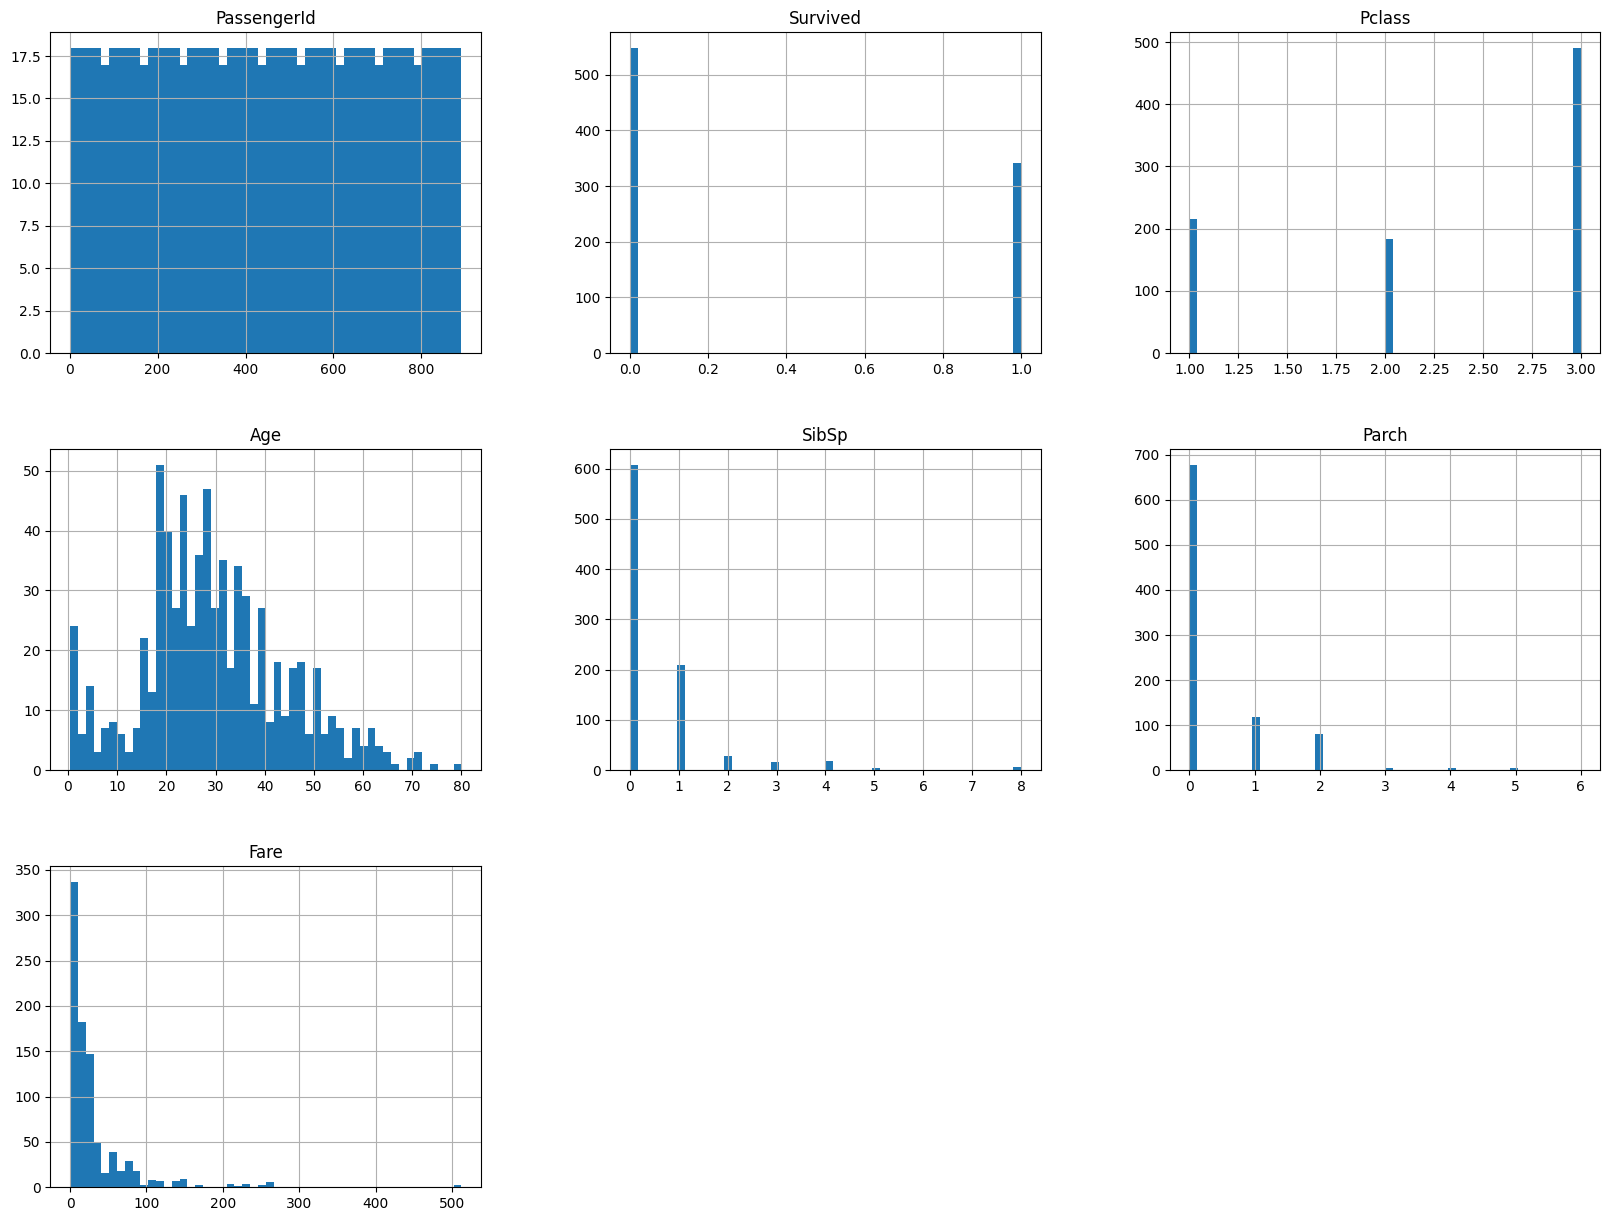

array([[<Axes: xlabel='Sex', ylabel='Sex'>,
        <Axes: xlabel='Age', ylabel='Sex'>,
        <Axes: xlabel='Survived', ylabel='Sex'>,
        <Axes: xlabel='Pclass', ylabel='Sex'>,
        <Axes: xlabel='SibSp', ylabel='Sex'>],
       [<Axes: xlabel='Sex', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>],
       [<Axes: xlabel='Sex', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>],
       [<Axes: xlabel='Sex', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>],
       [<Axes: xlabel='Sex', ylabel=

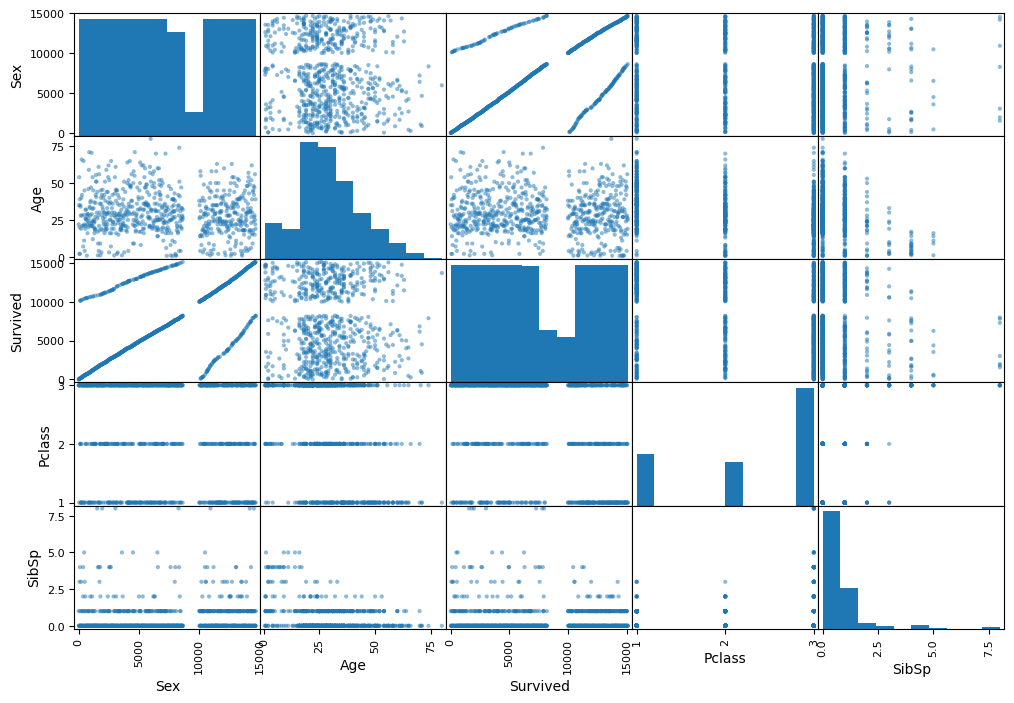

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))        
print('\n\n')
        
trainTitanicCSV = pd.read_csv("/kaggle/input/titanic/train.csv")

even_number = 0
odd_number = 10000
survivalValue = 10000
deathValue = 0

        
#variables are labeled incorrectly
#I don't care (upper is female, lower is male)

print(trainTitanicCSV.head(), '\n\n')
print(trainTitanicCSV.info())


%matplotlib inline
import matplotlib.pyplot as plt
trainTitanicCSV.hist(bins=50, figsize=(20,15))
plt.show()

for index, row in trainTitanicCSV.iterrows():
    if row['Sex'] == 'male':
        trainTitanicCSV.at[index, 'Sex'] = int(even_number)
        even_number += 15
    elif row['Sex'] == 'female':
        trainTitanicCSV.at[index, 'Sex'] = int(odd_number)
        odd_number += 15
    
    if row['Survived'] == 1 or row['Survived'] == '1':
        trainTitanicCSV.at[index, 'Survived'] = survivalValue
        survivalValue += 15
        
    elif row['Survived'] == 0 or row['Survived'] == '0':
        trainTitanicCSV.at[index, 'Survived'] = deathValue
        deathValue += 15

trainTitanicCSV['Sex'] = trainTitanicCSV['Sex'].astype(int)
trainTitanicCSV['Survived'] = trainTitanicCSV['Survived'].astype(int)

#variables are labeled incorrectly
#I don't care (upper is female, lower is male)

from pandas.plotting import scatter_matrix
attributes = ["Sex", "Age", "Survived", "Pclass", "SibSp"]
plt.rcParams['axes.labelsize'] = 10
scatter_matrix(trainTitanicCSV[attributes], figsize=(12, 8))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Frame the Problem =
Given the data for the Titantic experiment predict what variables contributed to the survivability of a passenger


2. Get the data -> Data is provided by experiement. 

3. Explore the data -> 

Women and children survived at rates of about 75 percent and 50 percent, while only 20 percent of men survived.[165]

White Star Line's offices in London, New York, Montreal,[182] Southampton,[183] Liverpool and Belfast.[184] It hit hardest in Southampton, whose people suffered the greatest losses from the sinking;[185] four out of every five crew members came from this town.[186] 

The figures show stark differences in the survival rates of the different classes aboard Titanic. Although only 3% of first-class women were lost, 54% of those in third-class died. Similarly, five of six first-class and all second-class children survived, but 52 of the 79 in third-class perished. The differences by gender were even bigger: nearly all female crew members, first- and second-class passengers were saved. Men from the First Class died at a higher rate than women from the Third Class.[234] In total, 50% of the children survived, 20% of the men and 75% of the women.


In [5]:
trainTitanicCSV = pd.read_csv("/kaggle/input/titanic/train.csv")

#cleaning data for numbers
trainTitanicCSV = trainTitanicCSV.drop(["PassengerId", "Ticket", "Fare", "Cabin", "Name"], axis=1)
trainTitanicCSV = trainTitanicCSV.replace(to_replace = "male", value = 0)
trainTitanicCSV = trainTitanicCSV.replace(to_replace = "female", value = 1)
titanicOneHotEncoded = pd.get_dummies(trainTitanicCSV)
titanicCorr = titanicOneHotEncoded.corr()
print(titanicCorr["Survived"].sort_values(ascending = False))

#splitting data
from sklearn.model_selection import train_test_split
trainTitanicCSV, testTitanicCSV = train_test_split(trainTitanicCSV, test_size=0.2)
#probably should add random_state = 42 but whatever


#it's modeling time
from sklearn.linear_model import LinearRegression
titanicLinearRegression = LinearRegression()
#creating my data
#trainTitanicSex = np.reshape(trainTitanicCSV['Sex'], (1, -1))
# trainTitanicSurvived = np.reshape(trainTitanicCSV['Survived'], (1, -1))
# testTitanicSex = np.reshape(testTitanicCSV['Sex'][:-1], (1, -1))

trainTitanicSex = np.reshape(trainTitanicCSV['Sex'], (-1, 1))
trainTitanicSurvived = trainTitanicCSV['Survived']
testTitanicSex = np.reshape(testTitanicCSV['Sex'], (-1, 1))

titanicLinearRegression.fit(trainTitanicSex, trainTitanicSurvived)

#testing rmse
from sklearn.metrics import mean_squared_error
titanicPredictions = titanicLinearRegression.predict(testTitanicSex)
titanicMSE = mean_squared_error(testTitanicCSV['Survived'], titanicPredictions)
titanicRMSE = np.sqrt(titanicMSE)
print('\n\nRMSE: ', titanicRMSE)


Survived      1.000000
Sex           0.543351
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.077221
Embarked_S   -0.155660
Pclass       -0.338481
Name: Survived, dtype: float64


RMSE:  0.40050861240230423


In [6]:
trainTitanicPClass = np.reshape(trainTitanicCSV['Pclass'], (-1, 1))
testTitanicPClass = np.reshape(testTitanicCSV['Pclass'], (-1, 1))
titanicLinearRegression.fit(trainTitanicPClass, trainTitanicSurvived)

#yippe
titanicPredictions = titanicLinearRegression.predict(testTitanicPClass)
titanicMSE = mean_squared_error(testTitanicCSV['Survived'], titanicPredictions)
titanicRMSE = np.sqrt(titanicMSE)
print('\n\nRMSE: ', titanicRMSE)



RMSE:  0.4648798727513742
